<a href="https://colab.research.google.com/github/Ismail-Amodu/Machine-Learning-Approach-To-Energy-Consumption-and-CO2-Emission-Prediction-in-Kiln-of-Cement-Plant/blob/main/Kiln_energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

In [3]:
# Importing models
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

Data collection and processing

In [4]:
# Loading the csv dataset into pandas dataframe
kiln_data = pd.read_csv('/content/Kiln_energy_dataset.csv')

In [5]:
# priinting the first five rows of the dataframe
kiln_data.head()

,Power (Kw),Power Consumption (MWH),Power Consumed (KWt/h),Absorbed Power (Kw),Power Consumption (Kw) Max.,Power (rotary drive) Kw,Energy Consumption (kWh/t-clinker)
0,80653,4330.9,80653,67901.0,104293.2,38000.4,349297.5
1,12983,569.3,12983,11400.0,15700.5,4781.5,7390.6
2,22200,537.4,22200,19947.9,27484.3,9887.7,11930.1
3,17606,381.0,17606,16235.3,21648.2,8581.7,6707.5
4,64947,1623.5,64947,61318.7,79270.7,27294.9,105440.3


In [6]:
# priinting the last five rows of the dataframe
kiln_data.tail()

,Power (Kw),Power Consumption (MWH),Power Consumed (KWt/h),Absorbed Power (Kw),Power Consumption (Kw) Max.,Power (rotary drive) Kw,Energy Consumption (kWh/t-clinker)
4995,80914,2523.1,80914,71534.0,98905.5,37007.5,204150.3
4996,83422,3241.7,83422,70744.3,104110.6,36856.8,270429.8
4997,31308,805.6,31308,26709.2,38724.4,14725.2,25222.2
4998,50901,1322.7,50901,42977.9,62632.0,15586.8,67324.5
4999,66113,3929.2,66113,62286.5,78489.9,25433.9,259768.0


In [7]:
# getting the number of rows and column in the dataframe
kiln_data.shape

(5000, 7)

In [8]:
# Getting some info about the data
kiln_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Power (Kw)                          5000 non-null   int64  
 1   Power Consumption (MWH)             5000 non-null   float64
 2   Power Consumed (KWt/h)              5000 non-null   int64  
 3   Absorbed Power (Kw)                 5000 non-null   float64
 4   Power Consumption (Kw) Max.         5000 non-null   float64
 5   Power (rotary drive) Kw             5000 non-null   float64
 6   Energy Consumption (kWh/t-clinker)  5000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 273.6 KB


In [9]:
# Checking for missing values
kiln_data.isnull().sum()

,0
Power (Kw),0
Power Consumption (MWH),0
Power Consumed (KWt/h),0
Absorbed Power (Kw),0
Power Consumption (Kw) Max.,0
Power (rotary drive) Kw,0
Energy Consumption (kWh/t-clinker),0


In [10]:
# Obtaining the statistical measures of the data
kiln_data.describe()

,Power (Kw),Power Consumption (MWH),Power Consumed (KWt/h),Absorbed Power (Kw),Power Consumption (Kw) Max.,Power (rotary drive) Kw,Energy Consumption (kWh/t-clinker)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,54684.828200,2272.402200,54684.828200,47868.189580,65597.102360,21865.354420,152197.663320
std,25982.715514,1299.248686,25982.715514,22968.473698,31412.071715,10934.224227,132249.307767
min,10007.000000,227.400000,10007.000000,8126.500000,11329.500000,3125.300000,2291.200000
25%,32086.500000,1200.725000,32086.500000,28097.975000,38511.325000,12510.150000,39676.300000
50%,54937.000000,2075.850000,54937.000000,47949.000000,65541.500000,21401.900000,117326.500000
75%,77291.500000,3132.075000,77291.500000,67428.675000,92198.275000,30244.675000,232920.750000
max,99910.000000,6133.000000,99910.000000,94738.600000,129467.200000,49877.600000,609262.200000


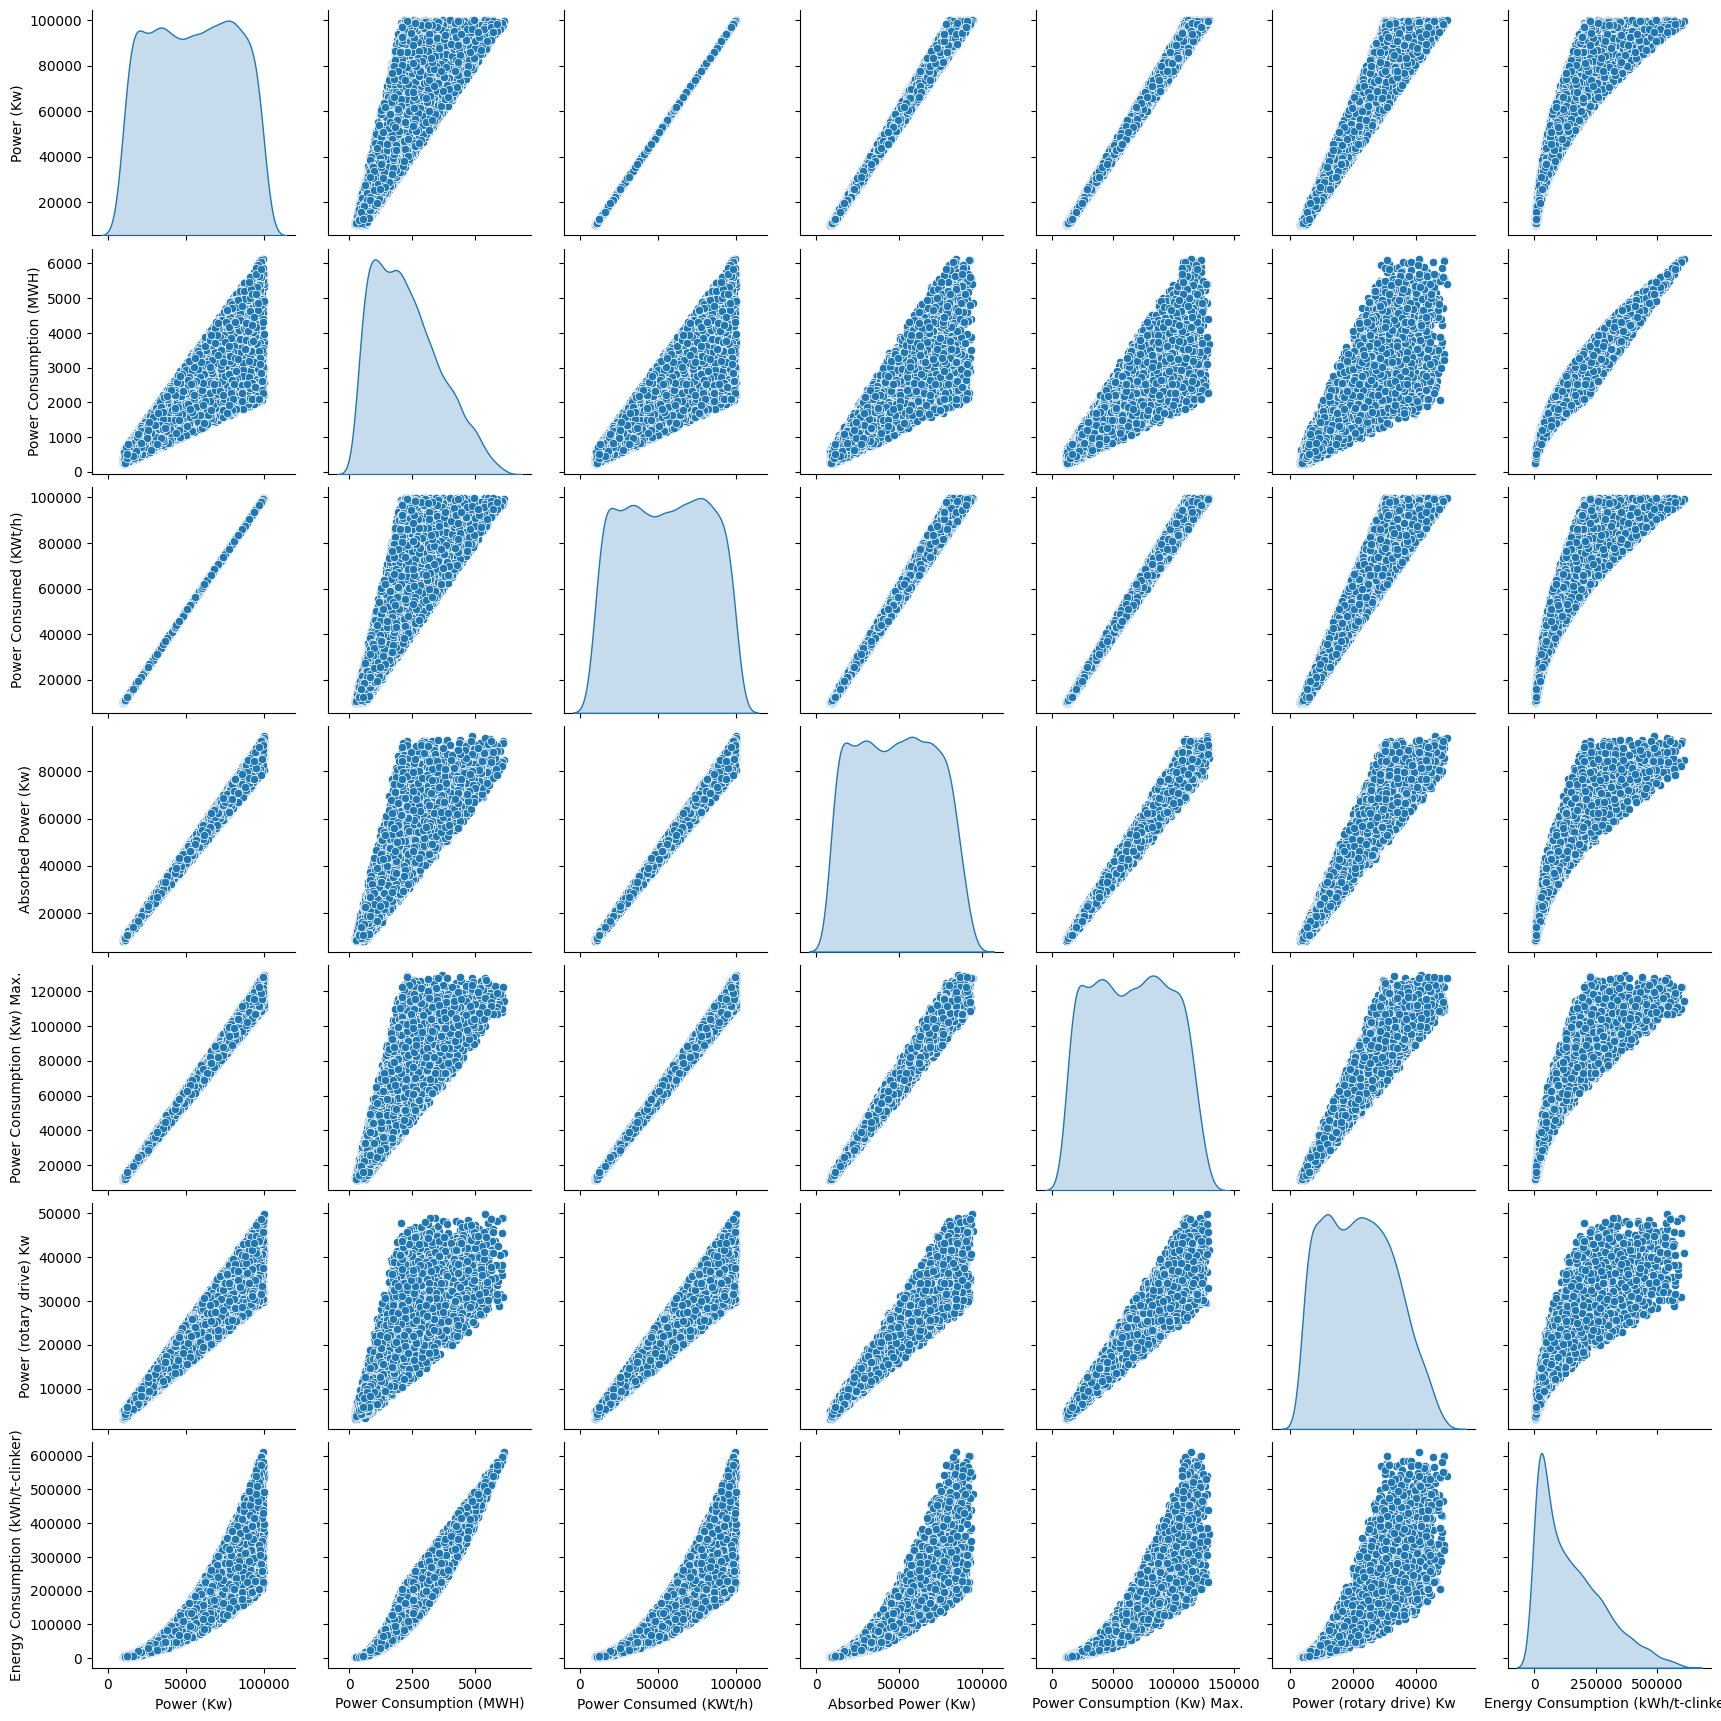

In [11]:
sns.pairplot(data=kiln_data, diag_kind='kde')
plt.show()

Correlation between features and target
1. Positive correlation
2. Negative correlation

<Axes: >

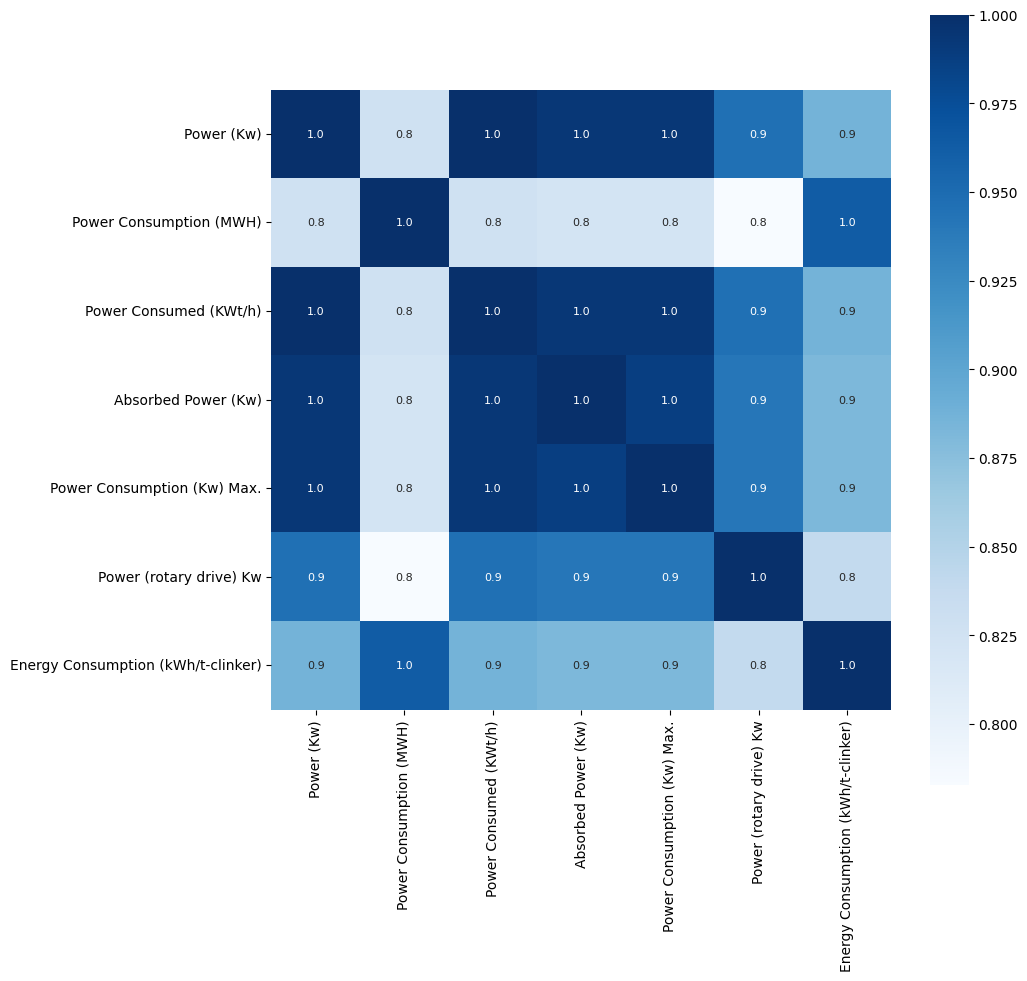

In [12]:
# Finding correlation between other column and the Quality column
correlation = kiln_data.corr()

# Constructing a heatmap to understand the correlation between the columns
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [13]:
# Splitting features and target
X = kiln_data.drop(columns='Energy Consumption (kWh/t-clinker)', axis=1)
Y = kiln_data['Energy Consumption (kWh/t-clinker)']

In [14]:
# Splitting data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(X.shape, X_train.shape, X_test.shape)

(5000, 6) (4000, 6) (1000, 6)


Model Training: Training the ML algorithms using the kiln energy dataset and comparing the model performances

In [15]:
# list of models
models = [XGBRegressor(n_estimators=100), SVR(kernel='linear'),RandomForestRegressor(n_estimators=100)]
def compare_models_train_test(X_train, X_test, Y_train, Y_test):
    global best_model # Declaring best_model as global variable
    model_scores = {} # Dictionary to store model scores
    for model in models:
        # Models Training
        model.fit(X_train, Y_train)

        # Models Evaluation
        test_data_prediction = model.predict(X_test)

        # R squared error
        error_score = r2_score(Y_test, test_data_prediction)
        model_scores[model.__class__.__name__] = error_score # Store the score
        print(f"Model: {model.__class__.__name__}")
        print(f"R-squared Error: {error_score:.4f}")

    # Find the model with the highest R-squared score
    best_model_name = max(model_scores, key=model_scores.get)
    best_model = next(model for model in models if model.__class__.__name__ == best_model_name)
    print(f"\nBest Model: {best_model_name} with R-squared score: {model_scores[best_model_name]:.4f}")

    return best_model
compare_models_train_test(X_train, X_test, Y_train, Y_test)

Model: XGBRegressor
R-squared Error: 0.9995
Model: SVR
R-squared Error: 0.9502
Model: RandomForestRegressor
R-squared Error: 0.9998

Best Model: RandomForestRegressor with R-squared score: 0.9998


RandomForestRegressor()

**RECOMMENDATION TECHNIQUE:** Feature Importance Analysis

*   Feature importance scores: These scores indicate how much each feature contributes to the model's predictions.

In [16]:
import pandas as pd

# As earlier defined in the code, 'X' is the feature dataframe
feature_names = X.columns
feature_importances = best_model.feature_importances_

# Creating DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                       Feature  Importance
1      Power Consumption (MWH)    0.852218
0                   Power (Kw)    0.066327
2       Power Consumed (KWt/h)    0.060363
3          Absorbed Power (Kw)    0.014550
4  Power Consumption (Kw) Max.    0.006452
5      Power (rotary drive) Kw    0.000091


Building A Predictive And Recommendation System

In [17]:
def predict_energy_consumption(input_data):
  """This function predicts energy consumption and provides recommendations.
  Args:
    input_data: A tuple containing the input features.
  Returns:
    A string containing the prediction and recommendation.
  """
  # Changing input data to numpy array
  input_data_as_numpy_array = np.asarray(input_data)

  # Reshaping the data for prediction
  input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

  # Make the prediction
  prediction = best_model.predict(input_data_reshaped)

  # Provide recommendation based on prediction
  if prediction >= 1050:
        recommendation = 'Recommendation: To reduce energy consumption, consider the following:\n'
        for index, row in importance_df.iterrows():
            feature_name = row['Feature']
            feature_value = input_data[X.columns.get_loc(feature_name)]
            if row['Importance'] > 0.1:  # Threshold for significant features
                if feature_value > kiln_data[feature_name].mean():
                    recommendation += f"- Reduce {feature_name} (current value: {feature_value:.2f})\n"
                else:
                    recommendation += f"- Increase {feature_name} (current value: {feature_value:.2f})\n"
  else:
      recommendation = 'The input fields give an efficient energy consumption. Proceed with the Kiln process.'

  return f"Predicted Energy Consumption: {prediction[0]:.2f} kWh/t-clinker\n{recommendation}"

Testing the predictive and recommendation system for one instance

In [18]:
# Example usage:
input_data = (75065,3755.4,75065,70926.5,94170.8,32793)
result = predict_energy_consumption(input_data)
print(result)

Predicted Energy Consumption: 283149.30 kWh/t-clinker
Recommendation: To reduce energy consumption, consider the following:
- Reduce Power Consumption (MWH) (current value: 3755.40)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Saving The Model

In [19]:
import pickle

filename = 'Kiln_energy_consumption_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

Loading The Saved Model

In [20]:
loaded_model = pickle.load(open('Kiln_energy_consumption_model.sav', 'rb'))